In [1]:
from golftracker import golf_swing_repository
import os
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [16, 8]


In [2]:
test1_db = os.path.join("..", "assets", "test1.pkl")
test1_path = os.path.join("..", "assets")
gs = golf_swing_repository.reconstitute(test1_db, test1_path)

In [81]:
def image_pipeline(img):
    img_blur = cv2.GaussianBlur(img, (7, 7) , 1)
    img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(img_gray, 125, 255, cv2.THRESH_BINARY_INV)[1]
    
    threshold1 = 100
    threshold2 = 200
    img_canny = cv2.Canny(thresh, threshold1, threshold2)
    kernel = np.ones((5, 5))
    img_dil = cv2.dilate(img_canny, kernel, iterations=1)
    return img_dil

In [4]:
poses = gs.get_poses_in_frames()

In [5]:
frames = gs.get_video_frames()

>>New video has width=432, ht=768, fps=30


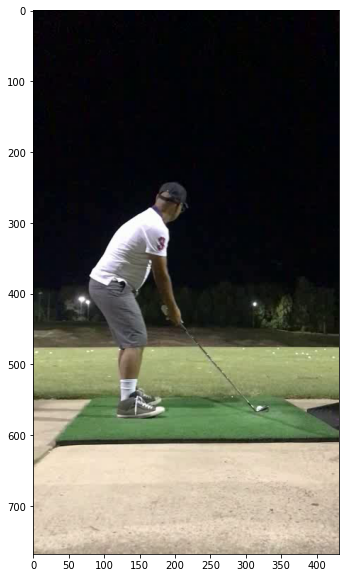

In [6]:
img = frames[0][...,::-1].copy()
imgplot = plt.imshow(img)

In [9]:
f = frames[0].copy()

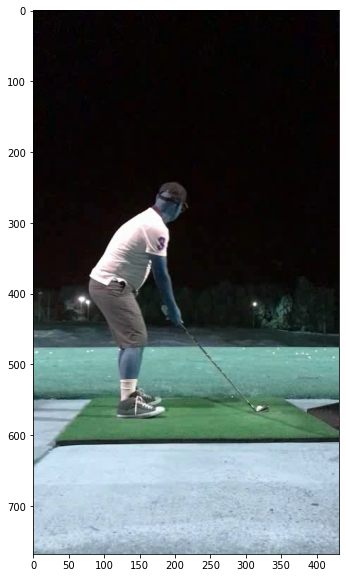

In [10]:
plt.imshow(f)

In [11]:
mask = np.zeros(f.shape, np.uint8)
mask[427:567, 199:450] = f[427:567, 199:450]


In [12]:
img = image_pipeline(mask)

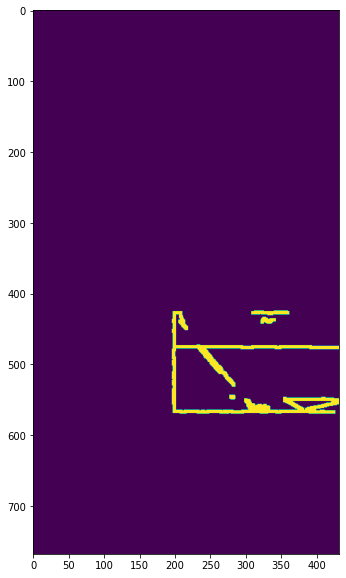

In [13]:
plt.imshow(img)

In [14]:
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [15]:
img_contours = frames[0].copy()

In [16]:
cv2.drawContours(img_contours, contours, -1, (255, 0, 255), 7)

array([[[  7,   4,   3],
        [  7,   4,   3],
        [  7,   4,   3],
        ...,
        [  5,   3,   8],
        [  5,   2,   9],
        [  5,   2,   9]],

       [[  7,   4,   3],
        [  7,   4,   3],
        [  7,   4,   3],
        ...,
        [  5,   3,   8],
        [  5,   2,   9],
        [  5,   2,   9]],

       [[  7,   4,   3],
        [  7,   4,   3],
        [  7,   4,   3],
        ...,
        [  5,   3,   8],
        [  5,   2,   9],
        [  5,   2,   9]],

       ...,

       [[131, 153, 168],
        [129, 151, 166],
        [127, 149, 164],
        ...,
        [138, 155, 171],
        [145, 162, 178],
        [151, 168, 184]],

       [[139, 161, 176],
        [135, 157, 172],
        [132, 154, 169],
        ...,
        [137, 154, 170],
        [145, 162, 178],
        [152, 169, 185]],

       [[147, 169, 184],
        [142, 164, 179],
        [139, 161, 176],
        ...,
        [132, 149, 165],
        [137, 154, 170],
        [143, 160, 176]]

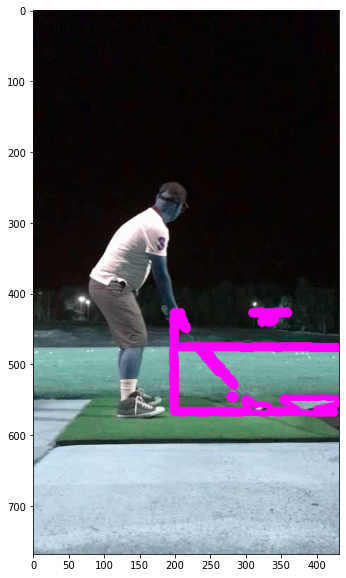

In [17]:
plt.imshow(img_contours)

In [19]:
final = frames[0].copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:
        cv2.drawContours(img_contours, cnt, -1, (255, 0, 255), 7)
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        print(len(approx))
        x, y, w, h = cv2.boundingRect(approx)
        cv2.rectangle(final, (x, y), (x +w, y + h), (0, 255, 0), 5)
        
        
        

12
9
4


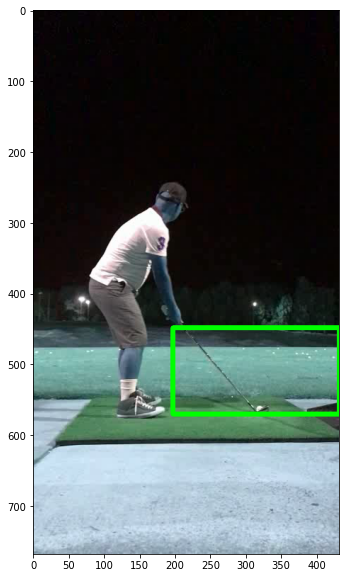

In [18]:
plt.imshow(final)

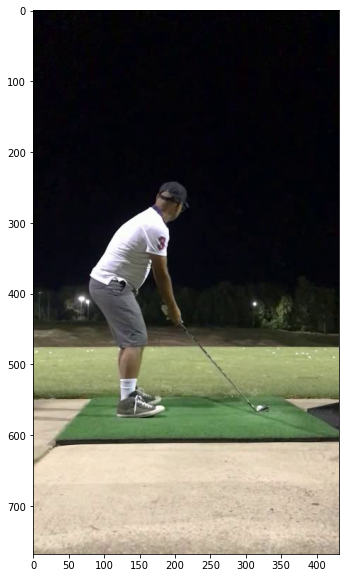

In [65]:
img = cv2.cvtColor(frames[2], cv2.COLOR_BGR2RGB)
plt.imshow(img)

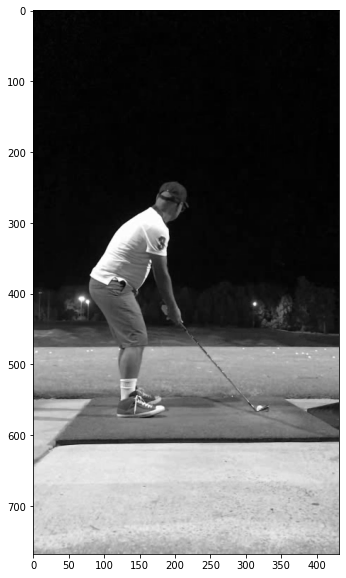

In [66]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

In [67]:
thresh = cv2.threshold(img_gray, 125, 255, cv2.THRESH_BINARY_INV)[1]

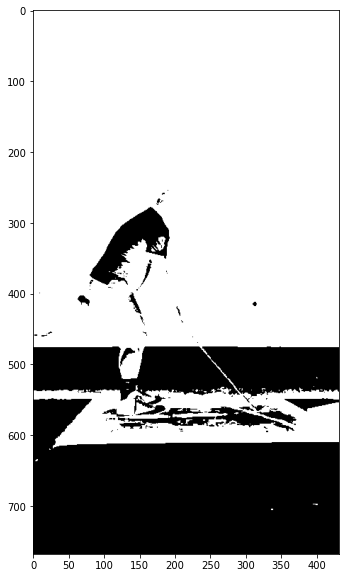

In [68]:
plt.imshow(thresh, cmap='gray')

In [72]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [77]:
blank = np.zeros(thresh.shape, np.uint8)
print(f"Number of contours {len(contours)}")
new = cv2.drawContours(frames[1], contours, -1, (0, 255, 0), 3)

Number of contours 161


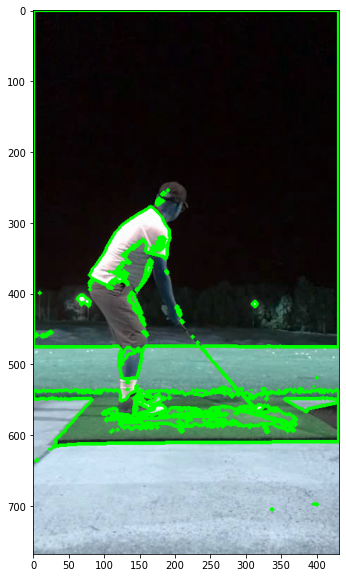

In [78]:
plt.imshow(frames[1])

In [79]:
mask = np.zeros(f.shape, np.uint8)
mask[427:567, 199:450] = frames[1][427:567, 199:450]

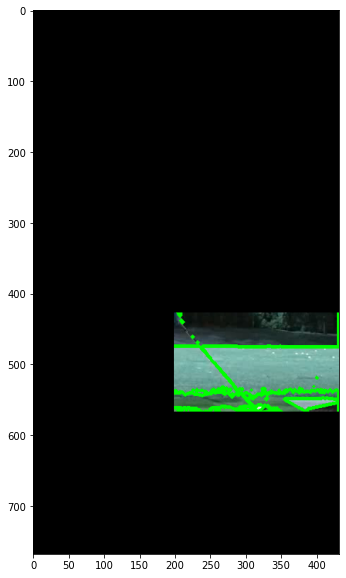

In [80]:
plt.imshow(mask)